# 高速フーリエ変換

In [12]:
import pyaudio
import wave 
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams 

In [13]:
def wave_load(filename):
    # open wave file
    wf = wave.open(filename,'r')
    channels = wf.getnchannels()

    # load wave data
    chunk_size = wf.getnframes()
    amp  = (2**8) ** wf.getsampwidth() / 2
    data = wf.readframes(chunk_size)   # バイナリ読み込み
    data = np.frombuffer(data,'int16') # intに変換
    data = data / amp                  # 振幅正規化
    data = data[::channels]
   
    return data

In [14]:
def fft_load(st,size,filename):
    '''
    st = サンプリング開始位置 [s]
    size = FFTのサンプル数（２＊＊ｎ）
    filename = オーディオファイルのディレクトリ

    '''
    #st=44100*st
    
    
    hammingWindow = np.hamming(size)    # ハミング窓
    fs = 44100 #サンプリングレート
    d = 1.0 / fs #サンプリングレートの逆数
    freqList = np.fft.fftfreq(size, d)
    
    rcParams["figure.figsize"]=16,8
    
    wave = wave_load(filename)
    #print(len(wave))
    
    #10000Hzごとにサンプルを10点取ってそれを平均したものを学習用の音声スペクトルデータとして用いる。
    for i in range(10):
        st=i*10000
        windowedData = hammingWindow * wave[st:st+size]  # 切り出した波形データ（窓関数あり）
        sample_data = np.fft.fft(windowedData)
        sample_data = sample_data / max(abs(sample_data)) # 0~1正規化
        if(i==0):
            data = sample_data
        else:
            data = (i*data+sample_data)/(i+1)
    
    data=abs(data)/max(abs(data))
    #print(type(data[0]))
    
    plt.plot(freqList,abs(data))
         
    plt.axis([0,fs/8,0,1]) #第二引数でグラフのy軸方向の範囲指定
    plt.title("audio_FFT_data")
    plt.xlabel("Frequency[Hz]")
    plt.ylabel("amplitude spectrum")
    #plt.show()

    return data

### 測定温度とスペクトルデータをまとめてdata配列に格納する

106522
0.214
4097


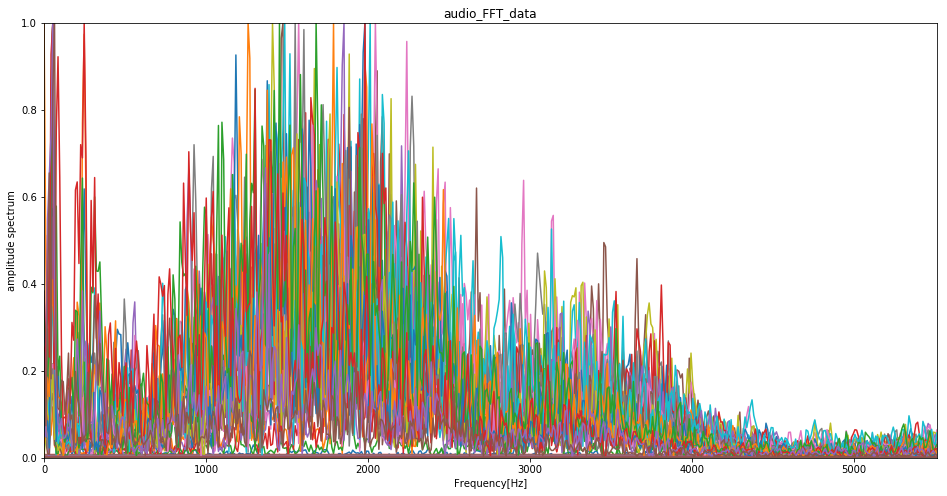

In [15]:
size=2**12

Tp=np.array([21.4, 34.5,30.8, 34.6, 42.0, 38.0, 43.1, 48.2, 47.9, 50.1, 57.9, 55.0, 56.7,\
                68.9, 63.6, 66.1, 71.8, 75.9, 75.0, 85.6, 79.5, 83.1, 91.0, 88.6, 94.2, 94.0])
Tp=Tp/100

data=np.array([])

#データ格納項(汚い)
data=np.append(data,Tp[0])
data=np.append(data,fft_load(2,size,"./t_fal_audio/0_5min.wav"))
data=np.append(data,Tp[1])
data=np.append(data,fft_load(2,size,"./t_fal_audio/1min.wav"))
data=np.append(data,Tp[2])
data=np.append(data,fft_load(2,size,"./t_fal_audio/1-2min.wav"))
data=np.append(data,Tp[3])
data=np.append(data,fft_load(2,size,"./t_fal_audio/1-3min.wav"))
data=np.append(data,Tp[4])
data=np.append(data,fft_load(2,size,"./t_fal_audio/1_5min.wav"))
data=np.append(data,Tp[5])
data=np.append(data,fft_load(2,size,"./t_fal_audio/1_5-2min.wav"))
data=np.append(data,Tp[6])
data=np.append(data,fft_load(2,size,"./t_fal_audio/1_5-3min.wav"))
data=np.append(data,Tp[7])
data=np.append(data,fft_load(2,size,"./t_fal_audio/2min.wav"))
data=np.append(data,Tp[8])
data=np.append(data,fft_load(2,size,"./t_fal_audio/2-2min.wav"))
data=np.append(data,Tp[9])
data=np.append(data,fft_load(2,size,"./t_fal_audio/2-3min.wav"))
data=np.append(data,Tp[10])
data=np.append(data,fft_load(2,size,"./t_fal_audio/2_5min.wav"))
data=np.append(data,Tp[11])
data=np.append(data,fft_load(2,size,"./t_fal_audio/2_5-2min.wav"))
data=np.append(data,Tp[12])
data=np.append(data,fft_load(2,size,"./t_fal_audio/2_5-3min.wav"))
data=np.append(data,Tp[13])
data=np.append(data,fft_load(2,size,"./t_fal_audio/3min.wav"))
data=np.append(data,Tp[14])
data=np.append(data,fft_load(2,size,"./t_fal_audio/3-2min.wav"))
data=np.append(data,Tp[15])
data=np.append(data,fft_load(2,size,"./t_fal_audio/3-3min.wav"))
data=np.append(data,Tp[16])
data=np.append(data,fft_load(2,size,"./t_fal_audio/3_5min.wav"))
data=np.append(data,Tp[17])
data=np.append(data,fft_load(2,size,"./t_fal_audio/3_5-2min.wav"))
data=np.append(data,Tp[18])
data=np.append(data,fft_load(2,size,"./t_fal_audio/3_5-3min.wav"))
data=np.append(data,Tp[19])
data=np.append(data,fft_load(2,size,"./t_fal_audio/4min.wav"))
data=np.append(data,Tp[20])
data=np.append(data,fft_load(2,size,"./t_fal_audio/4-2min.wav"))
data=np.append(data,Tp[21])
data=np.append(data,fft_load(2,size,"./t_fal_audio/4-3min.wav"))
data=np.append(data,Tp[22])
data=np.append(data,fft_load(2,size,"./t_fal_audio/4_5min.wav"))
data=np.append(data,Tp[23])
data=np.append(data,fft_load(2,size,"./t_fal_audio/4_5-2min.wav"))
data=np.append(data,Tp[24])
data=np.append(data,fft_load(2,size,"./t_fal_audio/5min.wav"))
data=np.append(data,Tp[25])
data=np.append(data,fft_load(2,size,"./t_fal_audio/5-2min.wav"))

print(len(data))

data=data.reshape((size+1,26))

print(data[0][0])
print(len(data))

"""
data[1025][n]:初項(０項目)が測定温度、以降1024個のスペクトルデータが格納されている。データ数(2次元目)がn個

"""

plt.show()

#22050Hzまでの周波数域にsizeに相当する数のサンプルがdataにリスト形式で保存される(複素数型)

### データをバイナリ形式でdatファイルに書き込み

In [18]:
with open("./t_fal_audio_data/np_data.dat", mode="wb") as f:
    data.tofile(f,sep="")

----
# 30秒ごとのデータを読みだして、予測用の音声データとして格納
----

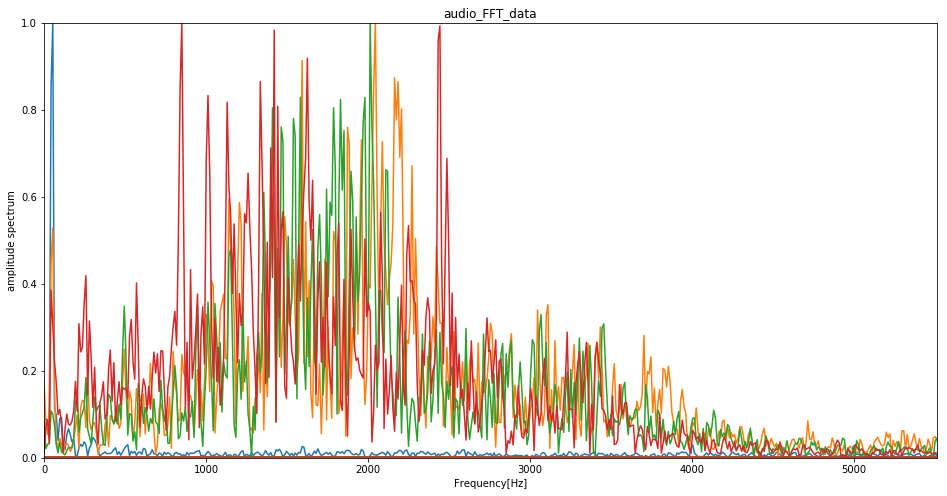

In [21]:
preTp=np.array([33.0, 49.8, 67.0, 82.1])

prediciton_data=np.array([])

prediciton_data=np.append(prediciton_data,preTp[0])
prediciton_data=np.append(prediciton_data,fft_load(2,size,"./t_fal_audio/1-premin.wav"))
prediciton_data=np.append(prediciton_data,preTp[1])
prediciton_data=np.append(prediciton_data,fft_load(2,size,"./t_fal_audio/2-premin.wav"))
prediciton_data=np.append(prediciton_data,preTp[2])
prediciton_data=np.append(prediciton_data,fft_load(2,size,"./t_fal_audio/3-premin.wav"))
prediciton_data=np.append(prediciton_data,preTp[3])
prediciton_data=np.append(prediciton_data,fft_load(2,size,"./t_fal_audio/4-premin.wav"))

with open("./t_fal_audio_data/np_prediction_data.dat", mode="wb") as f:
    prediciton_data.tofile(f,sep="")